In [2]:
import pandas as pd
import numpy as np


In [4]:
exam=pd.read_csv('exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [19]:
exam.loc[[2,7,14]],['math']=np.nan

SyntaxError: cannot assign to literal (Temp/ipykernel_8664/1901491613.py, line 1)

In [5]:
#math의 퍙균
exam['math'].mean()

57.45

In [6]:
exam['math']=exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [28]:
df=pd.DataFrame({'sex' :[1,2,1,8,2,1],'score':[5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,8,4
4,2,2
5,1,6


In [29]:
df['sex'].value_counts(sort=False).sort_index()

1    3
2    2
8    1
Name: sex, dtype: int64

In [30]:
#점수열을 카운트하기
df['score'].value_counts(sort=False).sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [31]:
#sex이 8이면 NaN부여 그렇지 않으면 자기자신 np.where
df['sex']=np.where(df['sex']==8,np.nan,df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [33]:
df['score']=np.where(df['score']>5,np.nan,df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [34]:
#sex,score 결축지제거
#sex별 분리
#score 평균 구하기

df.dropna(subset=['sex','score']).groupby('sex').agg(mean_score=('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [79]:
mpg=pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:ylabel='hwy'>

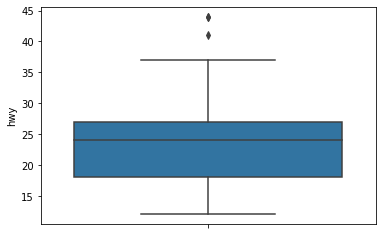

In [81]:
import seaborn as sns
sns.boxplot(data=mpg,y='hwy')

#극단적인 값


In [82]:
pct25=mpg['hwy'].quantile(.25)
pct25

18.0

In [83]:
pct75=mpg['hwy'].quantile(.75)
pct75

27.0

In [84]:
#IQR구하기
# iqr 75-25
iqr=pct75-pct25
iqr

9.0

In [85]:
#하한선,상한선 구하기
# 하한선 pct25-1.5*iqr
pct25-1.5*iqr

4.5

In [86]:
pct75+1.5*iqr

40.5

In [87]:
#극단치를 NaN 할당 처리하기
# 4.5~40.5 벗어나면 NaN부여
mpg['hwy']=np.where((mpg['hwy']< 4.5 )|(mpg['hwy']>40.5),np.nan,mpg['hwy'])
mpg['hwy'].isna().sum()

3

In [89]:
# hwy NaN제거
#drv분휴
# hwy평균
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


## 정리
```
## 1. 결측치 정제하기
pd.isna(df).sum()                  #결측치 확인
df_nomiss=df.dropna(subset=['score'])          #결측치 제거
df_nomiss=df.dtopna(subset=['scpre','sex'])        #여러 병수 동시에 결측치 제거

##2. 이상치 정제하기
#이상치 확인
df['sex'].value_counts(sort=False)

#이상치 결측 처리
df['sex']=np.where(df['sex']==3,np.where,df['sex'])

#상자 그림으로 극단치 기준값 찾기
pct25=mpg['hwy'].quantile(.25) #1사분위수
pct75 = mpg['hwy'].quantile(.75) # 3사분위수
iqr = pct75-pct25  #IQR
pct25-1.5*iqr
pct75+1.5*iqr

#극단치 결측 처리
mpg['hwy']=np.where((mpg['hwy']<4.5)|(mpg['hwy']>40.5),np.nan,mpg['hwy'])
```